# Assignment 2: Classification
# Using Machine Learning Tools

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of classifying data from histological cell images for the diagnosis of malignant breast cancer. This will be presented as a practical scenario where you are approached by a client to solve a problem.  

The main aims of this assignment are:

- to use the best practice machine learning workflow for producing a solution to a client's problem;
- to visualise and clean data;
- to train and optimise a selection of models, then choose the best;
- to obtain an unbiased measurement of the final model's performance;
- to interpret results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task, but feel free to add additional cells to structure your notebook. Note that some questions require writing code, some require graphical results, and some require comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (**with the correct results displayed**) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code can run correctly on the original data file.

This assignment uses the standard best practice machine learning workflow, building on the first assignment and course workshops, and so less detailed instructions are provided for this assignment. You should be able to implement this workflow now without low-level guidance and a substantial portion of the marks for this assignment are associated with the appropriate choices and executing this workflow correctly and efficiently. Make sure you have clean, readable code as well as producing outputs, since your coding will also count towards the marks (however, excessive commenting is discouraged and will lose marks, so aim for a modest, well-chosen amount of comments and text in outputs).

This assignment can be solved using methods from [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), and [matplotlib](https://matplotlib.org/stable/index.html) as presented in the workshops. Other libraries should not be used (even though they might have nice functionality) and occasionally certain specific functions need to be used, which will be made clear in the instruction text. You are expected to make sure that you are using functions correctly, and you should search and carefully read the documentation if unsure.

# Scenario

A client approaches you to solve a machine learning problem for them.  They run a pathology lab that processes histological images for healthcare providers and they have created a product that measures most of the same features as in the *Wisconsin breast cancer data set* though using different acquisitions and processing methods. Their method employs efficient stochastic sampling, making it much faster than existing methods, although slightly noisier. This method does not measure any of the 'worst' features that appear in the *Wisconsin Breast Cancer Data Set*. They want to be able to diagnose *malignant* cancer (and distinguish them from *benign* growths) by employing machine learning techniques, and they have asked you to implement this for them.

Their requirements are:
 - 1) Have at least a 90% probability of detecting malignant cancer when it is present;
 - 2) Ensure that no more than 1 in 5 healthy cases (those with benign growths) result in a false positive (labeled as malignant).

They have hand-labelled 220 samples for you, with 20 features per sample, which is all they have at the moment.

Please follow the instructions below, which will vary in level of detail.

## 1. Load data, visualise it and identify erroneous values [30%]

 - Load the data from the csv file `assignment2_data_2024.csv` (found on MyUni).
 - Extract the feature names and label names for use later on.
 - Provide at least one text summary of the dataset. This should include key information and characteristics of the data.
 - Create one graphical plot per feature. Each plot must display the feature values for the two classes (malignant and benign) separately on a single axis/panel.
 - Make sure you clearly label the graphical plots with respect to feature names, axes, classes, etc.
 - Identify any erroneous values in the dataset during the data visualisation or summary steps. Determine and implement, here or later, the appropriate action to handle these values (e.g., removal, correction, or none).
 - Throughout this assignment, treat the _malignant_ cases as the _true positive_ class, following the standard convention in medicine.
.

In [2]:
# This code imports some libraries that you will need.
# You should not need to modify it, though you are expected to make other imports later in your code.

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import numpy as np
import time

# Pandas for overview
import pandas as pd

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn import tree
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# Plot setup
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=7)
mpl.rc('xtick', labelsize=6)
mpl.rc('ytick', labelsize=6)
mpl.rc('figure', dpi=240)
plt.close('all')

import seaborn as sns

In [3]:
# Your code here
# Loading the data from the csv file `assignment2_data_2024.csv`
cancer_dataframe = pd.read_csv("assignment2_data_2024.csv")
cancer_dataframe.head()

,label,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error
0,malignant,15.494653829645529,15.902542,103.008265,776.437239,0.104239,0.168660,0.170572,0.085668,0.205053,...,0.653654,1.096678,4.962255,80.619370,0.006669,0.034950,0.043568,0.013765,0.024093,0.004928
1,malignant,16.229870799611437,18.785613,105.176755,874.712003,0.091843,0.092548,0.081681,0.053670,0.180435,...,0.445451,1.043931,3.005373,50.407958,0.006352,0.019998,0.025324,0.012172,0.018084,0.003582
2,malignant,16.34567074196476,20.114076,107.083804,872.563251,0.099924,0.123799,0.128788,0.078310,0.189756,...,0.549625,1.057447,3.643671,62.732851,0.006757,0.031325,0.034350,0.015150,0.021459,0.004066
3,maligant,13.001009157806651,19.876997,85.889775,541.281012,0.113423,0.173069,0.146214,0.069574,0.212078,...,0.430693,1.202955,3.051434,33.614356,0.007930,0.044881,0.042972,0.014556,0.035670,0.005981
4,malignant,16.416060073302194,17.397533,107.857386,891.516818,0.097321,0.111530,0.125971,0.068575,0.179562,...,0.525532,1.045900,3.747194,59.164555,0.008718,0.024231,0.039763,0.014202,0.019236,0.004115


In [4]:
# Making a copy of out data frame to work with.
cancer_df_copy = pd.DataFrame(cancer_dataframe)

In [5]:
cancer_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    220 non-null    object 
 1   mean radius              220 non-null    object 
 2   mean texture             220 non-null    float64
 3   mean perimeter           220 non-null    float64
 4   mean area                220 non-null    float64
 5   mean smoothness          220 non-null    float64
 6   mean compactness         220 non-null    float64
 7   mean concavity           220 non-null    float64
 8   mean concave points      220 non-null    float64
 9   mean symmetry            220 non-null    float64
 10  mean fractal dimension   220 non-null    float64
 11  radius error             220 non-null    float64
 12  texture error            220 non-null    float64
 13  perimeter error          220 non-null    float64
 14  area error               2

In [6]:
cancer_df_copy.describe()

,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,219.000000,220.000000
mean,18.991963,89.866240,620.956227,0.096480,0.102879,0.085281,0.046867,0.181850,0.103957,0.393337,1.217593,2.775090,37.781034,0.007076,0.025514,0.031901,0.011762,0.020901,0.003873
std,1.427635,7.366180,106.419871,0.004961,0.019819,0.026911,0.012548,0.010816,0.606979,0.075828,0.210182,0.579317,9.988655,0.001043,0.007345,0.014102,0.002422,0.003250,0.001259
min,15.349270,74.690886,-2.645499,0.084651,0.075184,0.050771,0.028701,0.157059,0.058922,0.298005,0.898026,2.059186,27.693748,0.004994,0.016907,0.018730,0.007253,0.016181,0.002631
25%,17.914319,84.911981,558.731832,0.092797,0.089531,0.066525,0.038106,0.174944,0.061139,0.343114,1.073344,2.394331,31.843894,0.006372,0.020530,0.025373,0.010336,0.018658,0.003225
50%,18.928256,88.587737,603.806128,0.096457,0.098517,0.075748,0.042761,0.180953,0.062557,0.367863,1.165727,2.610732,34.007608,0.006837,0.023147,0.028835,0.011357,0.020193,0.003555
75%,19.995859,93.066393,655.690435,0.099817,0.113276,0.098826,0.055337,0.186354,0.064184,0.420514,1.300769,3.003888,39.042484,0.007675,0.027733,0.033620,0.012669,0.022195,0.004046
max,24.430831,121.247839,1103.740620,0.113423,0.192880,0.201971,0.100467,0.226448,9.065897,0.712896,2.561348,5.903661,80.619370,0.011088,0.054950,0.163592,0.026554,0.041861,0.013251


In [7]:
# We will create graphical representation for all features but first we need to convert all non - numerical features to numerical and by {cancer_df_copy.info()} 
# we checked that one of our feature {mean radius} is type object.

non_numeric_mask = cancer_df_copy['mean radius'].apply(lambda x: pd.to_numeric(x, errors='coerce')).isna()
non_numeric_values = cancer_df_copy.loc[non_numeric_mask, 'mean radius']

# Display the rows with non-numeric values in 'mean radius'
print(non_numeric_values)

# Using regular expressions directly to remove non-numeric characters
cancer_df_copy['mean radius'] = cancer_df_copy['mean radius'].str.replace(r'[^\d.]', '', regex=True)
cancer_df_copy['mean radius'] = pd.to_numeric(cancer_df_copy['mean radius'])



61    n12.254518716420597
Name: mean radius, dtype: object


In [8]:
# Checking if the type of feature {mean radius} is changed to float
cancer_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    220 non-null    object 
 1   mean radius              220 non-null    float64
 2   mean texture             220 non-null    float64
 3   mean perimeter           220 non-null    float64
 4   mean area                220 non-null    float64
 5   mean smoothness          220 non-null    float64
 6   mean compactness         220 non-null    float64
 7   mean concavity           220 non-null    float64
 8   mean concave points      220 non-null    float64
 9   mean symmetry            220 non-null    float64
 10  mean fractal dimension   220 non-null    float64
 11  radius error             220 non-null    float64
 12  texture error            220 non-null    float64
 13  perimeter error          220 non-null    float64
 14  area error               2

In [9]:
# Extracting the feature names and label names for use later on.
features = cancer_df_copy.columns[1: ]
labels = cancer_df_copy['label'].unique()
print("features:", features)
print("labels:", labels)

features: Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error'],
      dtype='object')
labels: ['malignant' 'maligant' 'benign']


In [10]:
# As we can see in labels we are getting 3 different values but according to the description given above
# there should be only 2 values in labels so we will check which one is written by mistake and change it.

cancer_df_copy['label'] = cancer_df_copy['label'].replace('maligant', 'malignant')
labels = cancer_df_copy['label'].unique()
print("labels:", labels)


labels: ['malignant' 'benign']


In [11]:
# Summary of the dataset.
# The set has 220 samples with 20 features each, it is like the Wisconsin breast cancer dataset but does not contain 'worst' features. 
# In the case of the client that wants to detect malignant cancer with at least a 90% detection rate the data scientists are requested 
# to diagnose the tumors with no more than 20% false positives among benign cases. The data will have to be adjusted for missing values and 
# then normalized. Logistic Regression, Random Forest, and SVM are good models for the above evaluation which can be done with recall and
# specificity metrics.

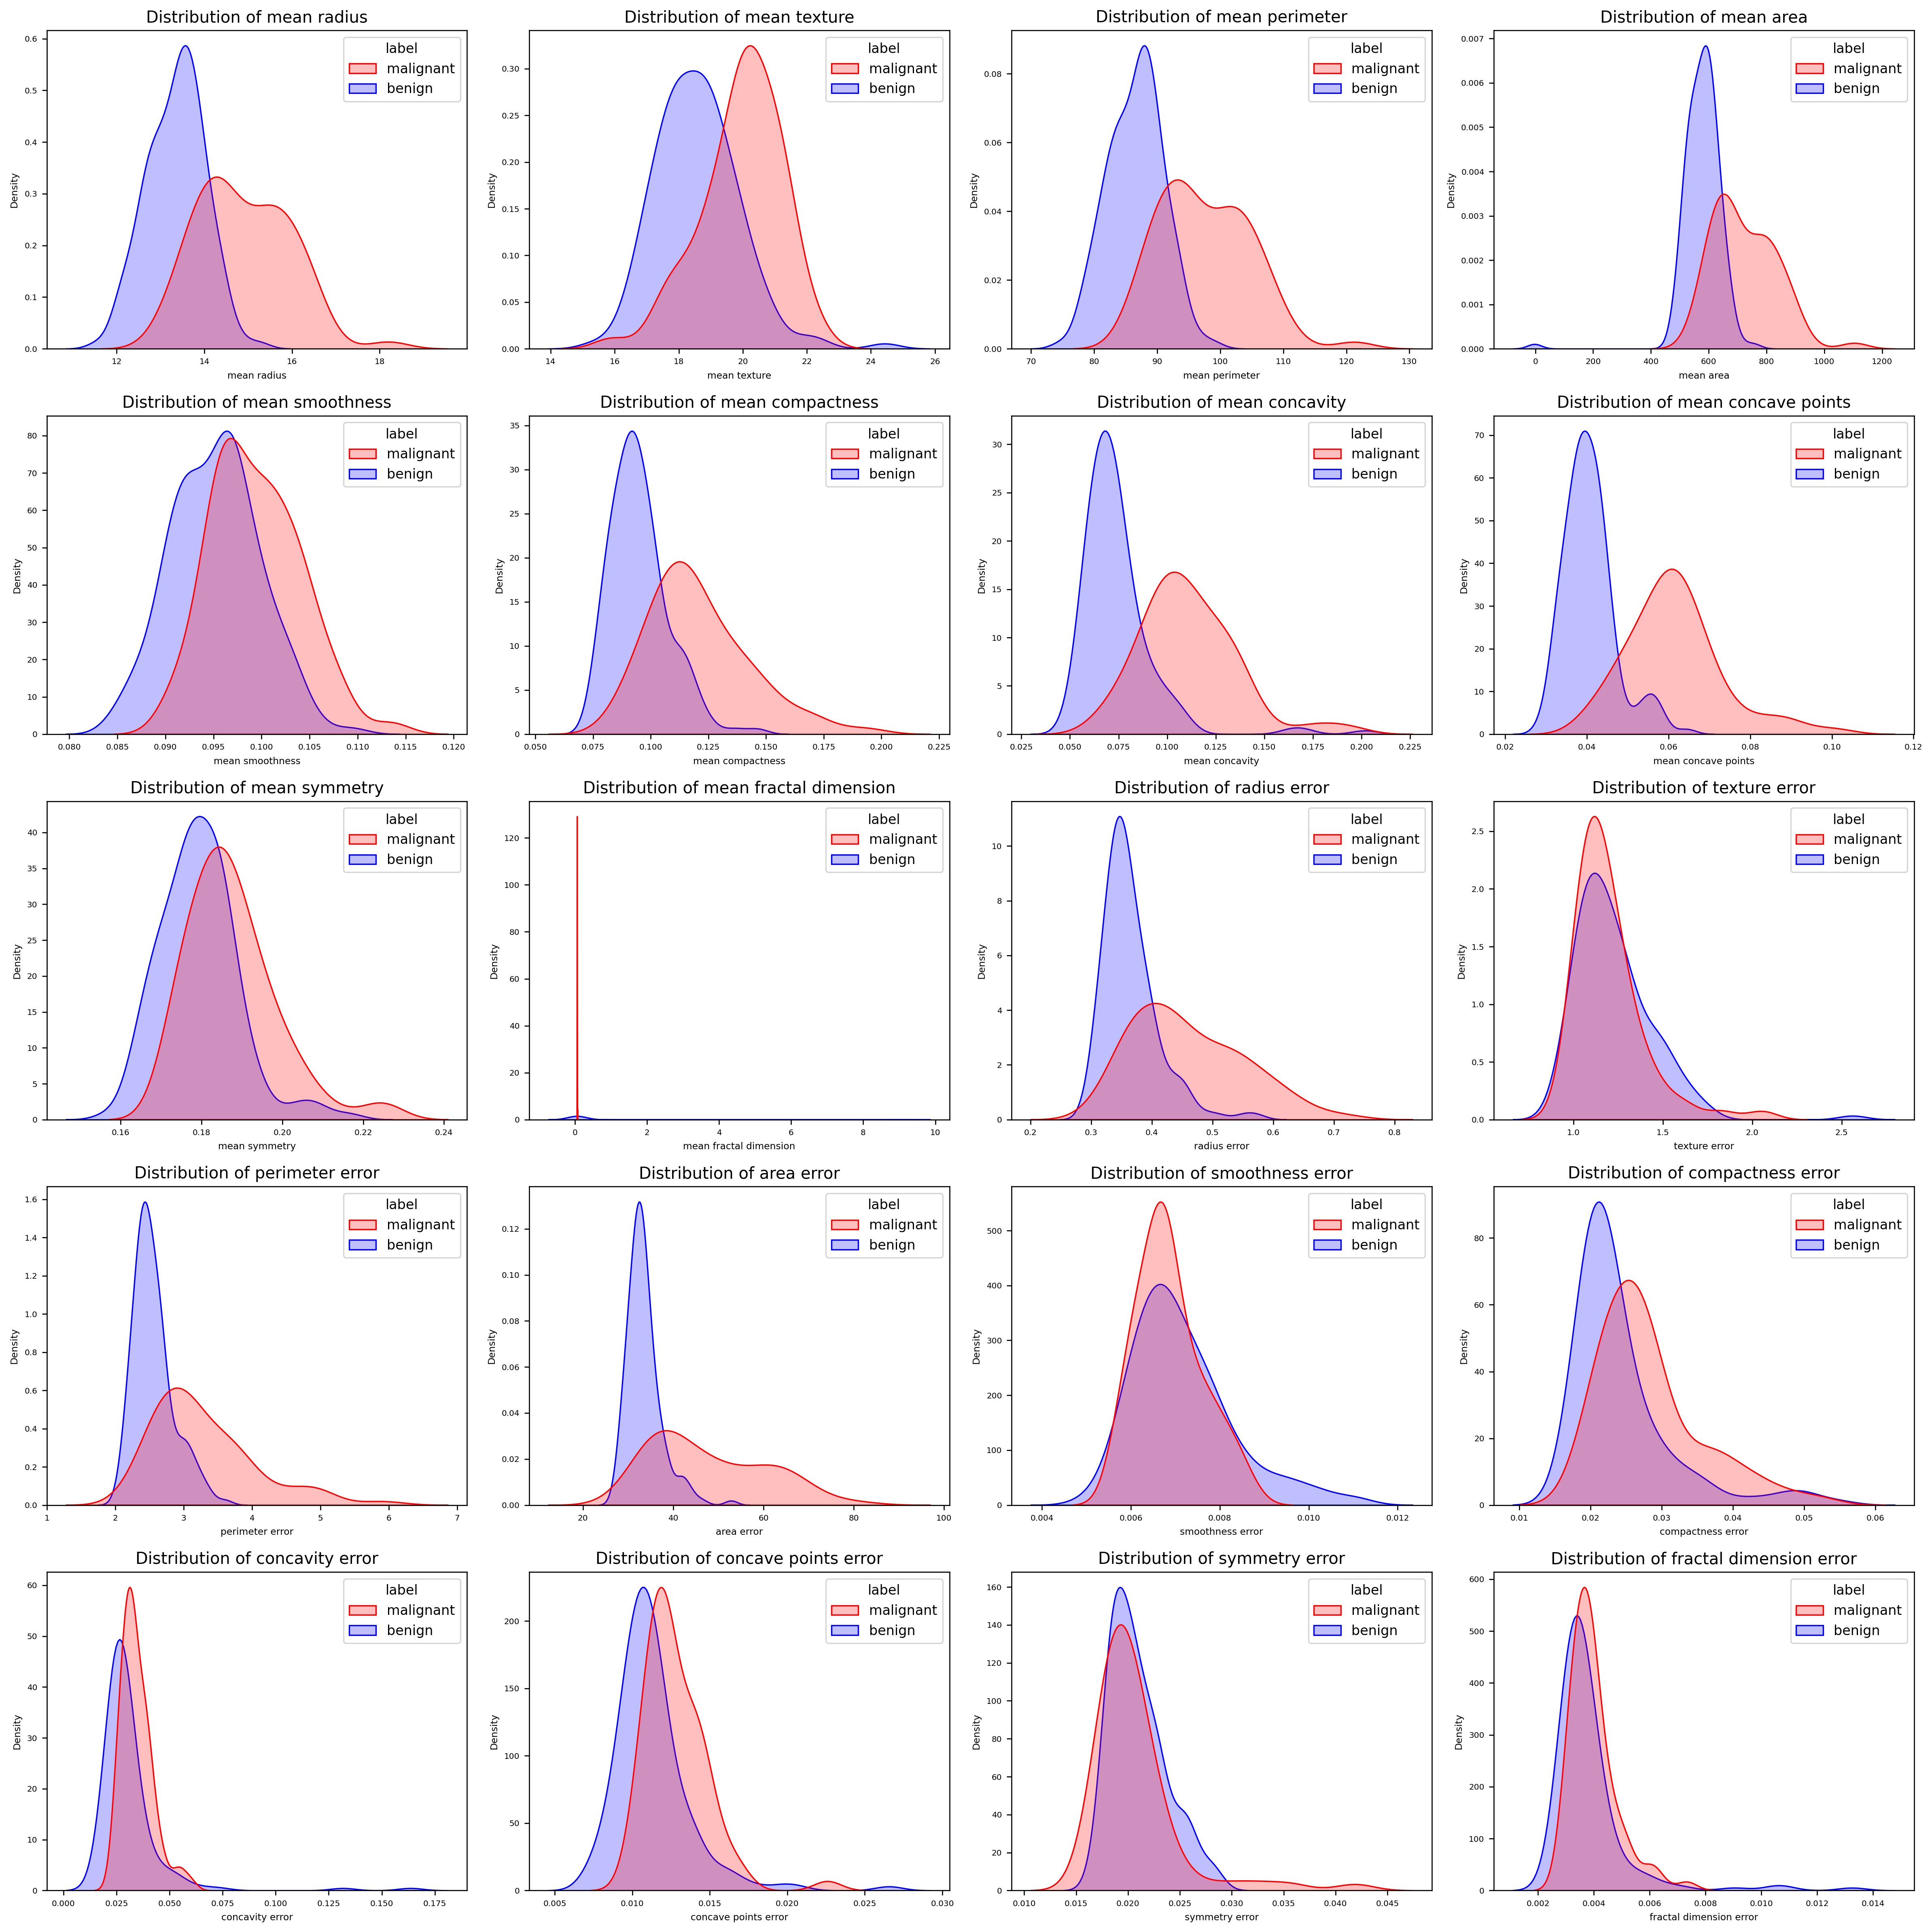

In [12]:
# Now we can graphically represent all features although there are some erroneous values such as 'null' value in feature {symmetry error} 
# and negative value in feature {mean area} which we will handle later.

fig, axes = plt.subplots(5, 4, figsize=(20, 20))
axes = axes.flatten()

# Loop through the features and create a KDE plot for each
for i, feature in enumerate(features):
    sns.kdeplot(data=cancer_df_copy, x=feature, hue='label', ax=axes[i], fill=True, common_norm=False, palette=["red", "blue"])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

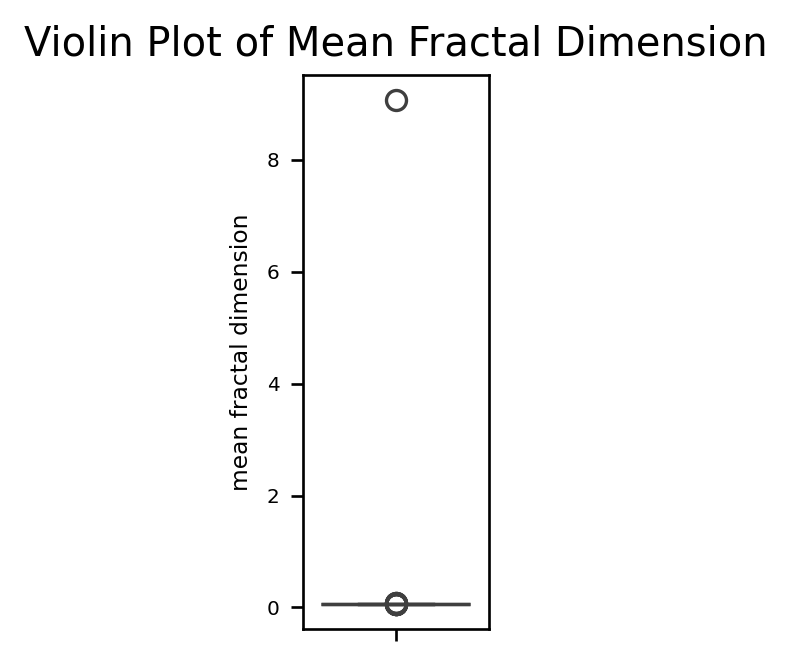

In [13]:
# Looking at our graphs, feature {mean fractal dimension} is little odd lets check for outliers using box plot for that feature

plt.figure(figsize=(1, 3))
sns.boxplot(data=cancer_df_copy, y='mean fractal dimension')
plt.title('Violin Plot of Mean Fractal Dimension')
plt.show()

In [14]:

# Calculate Q1 (25th percentile) and Q3 (75th percentile)

Q1 = cancer_df_copy['mean fractal dimension'].quantile(0.25)
Q3 = cancer_df_copy['mean fractal dimension'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for filtering out outliers
#lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame
cancer_df_copy = cancer_df_copy[ (cancer_df_copy['mean fractal dimension'] <= upper_bound)]



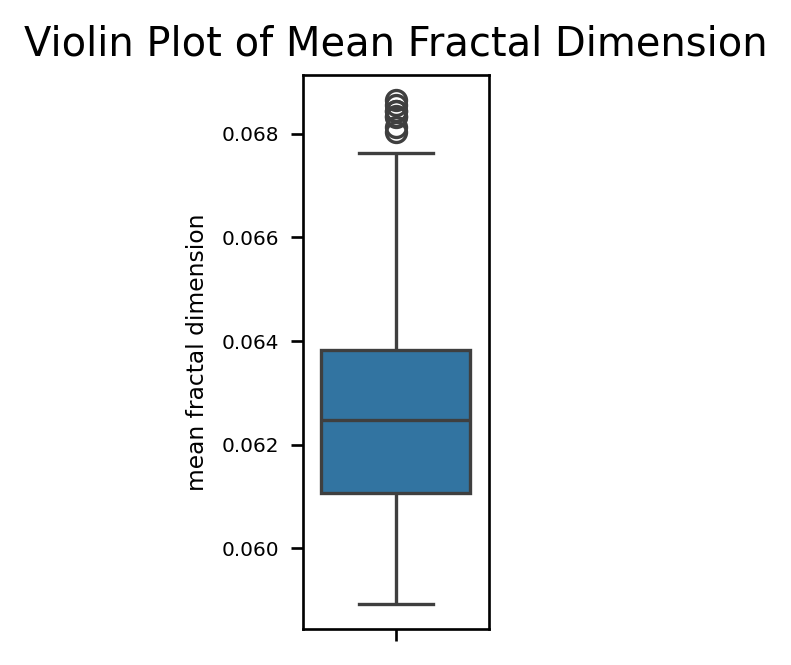

In [15]:
plt.figure(figsize=(1, 3))
sns.boxplot(data=cancer_df_copy, y='mean fractal dimension')
plt.title('Violin Plot of Mean Fractal Dimension')
plt.show()

In [16]:
# Now we can check for features with erroneous values 
# Checking number of negative values in feature {mean area}

negative_values = len(cancer_df_copy[cancer_df_copy['mean area'] < 0])
print(negative_values)

1


In [17]:
# There is only one negative value in mean area and as we know area can not be in negative so we can replace it with mean of that feature

mean_area_excluding_negatives = cancer_df_copy[cancer_df_copy['mean area'] >= 0]['mean area'].mean()
cancer_df_copy.loc[cancer_df_copy['mean area'] < 0, 'mean area'] = mean_area_excluding_negatives

cancer_df_copy.describe()['mean area']

count     210.000000
mean      625.822754
std        95.562164
min       477.371592
25%       562.928342
50%       605.176027
75%       656.081189
max      1103.740620
Name: mean area, dtype: float64

In [18]:
# There is a null value in feature {symmetry error} and looking at graphical representation, we can replace that null value with mean of that feature

mean_symmetry_error = cancer_df_copy['symmetry error'].mean()
cancer_df_copy['symmetry error'].fillna(mean_symmetry_error, inplace=True)

cancer_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, 1 to 219
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    210 non-null    object 
 1   mean radius              210 non-null    float64
 2   mean texture             210 non-null    float64
 3   mean perimeter           210 non-null    float64
 4   mean area                210 non-null    float64
 5   mean smoothness          210 non-null    float64
 6   mean compactness         210 non-null    float64
 7   mean concavity           210 non-null    float64
 8   mean concave points      210 non-null    float64
 9   mean symmetry            210 non-null    float64
 10  mean fractal dimension   210 non-null    float64
 11  radius error             210 non-null    float64
 12  texture error            210 non-null    float64
 13  perimeter error          210 non-null    float64
 14  area error               210 no

/tmp/ipykernel_1656/56550281.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cancer_df_copy['symmetry error'].fillna(mean_symmetry_error, inplace=True)


## 2. Prepare data and models, and make baseline measurements [20%]
 - Split data into appropriate sets using the `stratify` option to obtain consistent proportions of classes in each set.
 - Decide on appropriate pre-processing steps for the data.
 - Implement a _very_ simple baseline model that makes purely random predictions of the class.
 - Measure the baseline performance with the following metrics:
   - accuracy
   - balanced accuracy: accounts for imblanaced datasets, defined as _(sensitivity + specificity)/2_
   - recall
   - precision
   - auc
   - f1score
   - fbeta_scores with beta=0.1
   - fbeta_score with beta=10
 - Also display a confusion matrix for the baseline predictions.
 - As a second baseline, implement an SGD classifier and fit it once (without hyper-parameter optimisation) and then display the same performance metrics and a confusion matrix for its results.

In [19]:
# Some helpful code that you can use if you wish (or not)

from sklearn.metrics import fbeta_score, make_scorer

f10_scorer = make_scorer(fbeta_score, beta=10)
f01_scorer = make_scorer(fbeta_score, beta=0.1)

def f10_score(yt,yp):
    return fbeta_score(yt, yp, beta=10)

def f01_score(yt,yp):
    return fbeta_score(yt, yp, beta=0.1)

In [20]:
# Your code here
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

X, y = cancer_df_copy[features], cancer_df_copy['label']
y = LabelBinarizer(pos_label=1).fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=cancer_df_copy['label'])

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Creating Pipeling
preprocess_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Fit the pipeline to the training data
X_train_transformed = preprocess_pipeline.fit_transform(X_train)
X_test_transformed = preprocess_pipeline.transform(X_test)

In [22]:
# Implementing a very simple baseline model that makes purely random predictions of the class

from sklearn.preprocessing import label_binarize
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, recall_score,
    precision_score, roc_auc_score, f1_score, confusion_matrix
)

class_labels = np.unique(y_train)

# Generate random predictions
np.random.seed(42)  # For reproducibility
random_predictions = np.random.choice(class_labels, size=len(y_test))

# Calculate metrics
accuracy = accuracy_score(y_test, random_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, random_predictions)
recall = recall_score(y_test, random_predictions, average='weighted')
precision = precision_score(y_test, random_predictions, average='weighted')
f1 = f1_score(y_test, random_predictions, average='weighted')
fbeta_10= f10_score(y_test, random_predictions)
fbeta_0_1 = f01_score(y_test, random_predictions)

# For AUC, we need probability estimates. Here we use uniform probabilities since it's a random baseline.
y_test_bin = label_binarize(y_test, classes=class_labels)
n_classes = y_test_bin.shape[1]
random_probabilities = np.random.rand(len(y_test), n_classes)
auc = roc_auc_score(y_test_bin, random_probabilities, average='weighted', multi_class='ovr')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, random_predictions)

# Print the results
print(f"Random Baseline Model Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Balanced Accuracy: {balanced_accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"AUC: {auc}")
print(f"F1 Score: {f1}")
print(f"F-beta Score (beta=0.1): {fbeta_0_1}")
print(f"F-beta Score (beta=10): {fbeta_10}")
print(f"Confusion matrix: {conf_matrix}")


Random Baseline Model Metrics:
Accuracy: 0.42857142857142855
Balanced Accuracy: 0.4
Recall: 0.42857142857142855
Precision: 0.5116883116883117
AUC: 0.3222222222222222
F1 Score: 0.45604395604395603
F-beta Score (beta=0.1): 0.2007952286282306
F-beta Score (beta=10): 0.33114754098360655
Confusion matrix: [[14 16]
 [ 8  4]]


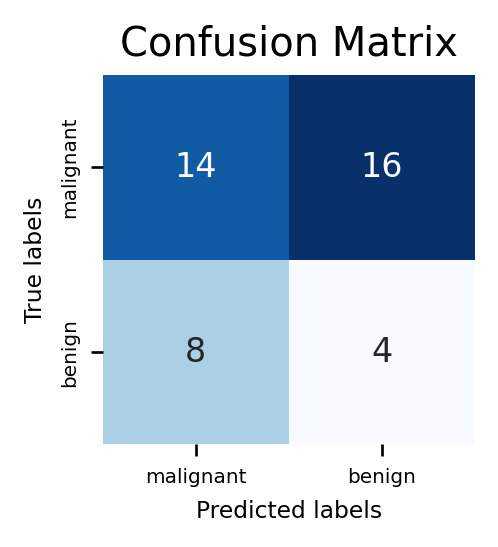

In [23]:
# Confusion Matrix for baseline model

plt.figure(figsize=(2,2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [24]:
# implementing an SGD classifier and fitting it once (without hyper-parameter optimisation)

from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=42)
y_train = y_train.ravel()

# Train the classifier
sgd.fit(X_train, y_train)

# Make predictions
y_pred = sgd.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred)
fbeta_10= f10_score(y_test, random_predictions)
fbeta_0_1 = f01_score(y_test, random_predictions)

# For AUC, we need probability estimates
if len(np.unique(y_train)) == 2:  # Binary classification
    y_prob = sgd.decision_function(X_test)
    auc = roc_auc_score(y_test, y_prob)
else:  # Multiclass classification
    y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
    y_prob = sgd.decision_function(X_test)
    auc = roc_auc_score(y_test_bin, y_prob, multi_class='ovr')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"SGD Classifier Model Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Balanced Accuracy: {balanced_accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"AUC: {auc}")
print(f"F1 Score: {f1}")
print(f"F-beta Score (beta=0.1): {fbeta_0_1}")
print(f"F-beta Score (beta=10): {fbeta_10}")
print("Confusion Matrix:")
print(conf_matrix)

SGD Classifier Model Metrics:
Accuracy: 0.8809523809523809
Balanced Accuracy: 0.7916666666666667
Recall: 0.5833333333333334
Precision: 1.0
AUC: 0.9194444444444445
F1 Score: 0.7368421052631579
F-beta Score (beta=0.1): 0.2007952286282306
F-beta Score (beta=10): 0.33114754098360655
Confusion Matrix:
[[30  0]
 [ 5  7]]


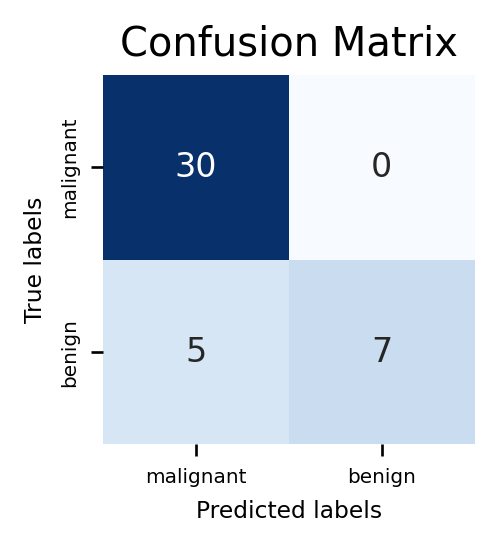

In [25]:
plt.figure(figsize=(2,2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## 3. Model Optimisation [40%]

### 3.1 Performance metric
Choose one performance metric from the above set. State your choice and explain why you chose it. [50 words maximum]

In [26]:
# Answer here
# The client insists that the model should get at least 90% of the patients who are detected with real malignant cancer. Meanwhile, he also expects it to return 
# false information in no more than 20% of the cases, which reinforces that not more than 1 in every 5 benign case error will occur. On the other hand, these two 
# concepts- The sensitivity and the False Positive Rate are the main parameters for evaluation.

### 3.2 Hyper-parameter optimisation
 - Perform a hyper-parameter optimisation (using appropriate methods) on three models:
   - SGD Classifer
   - SVM
   - One other model of your choice
 - Display the results of each model (including confusion matrices) and choose the best model.
 - Choose the best model and display the final results of this model.

**SGD**

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV

# Hyperparameter grids
sgd_param_grid = {
    'loss': ['hinge', 'log_loss'],
    'penalty': ['l2', 'l1','elasticnet'],
    'alpha': [0.0001,0.001, 0.01, 0.1],
    'max_iter': [2000, 3000],
}

sgd = SGDClassifier(random_state=42)
sgd_grid = GridSearchCV(sgd, sgd_param_grid, cv = 3, n_jobs=12, refit=True, scoring='recall')
sgd_grid.fit(X_train_transformed, y_train)


GridSearchCV(cv=3, estimator=SGDClassifier(random_state=42), n_jobs=12,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'loss': ['hinge', 'log_loss'],
                         'max_iter': [2000, 3000],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='recall')

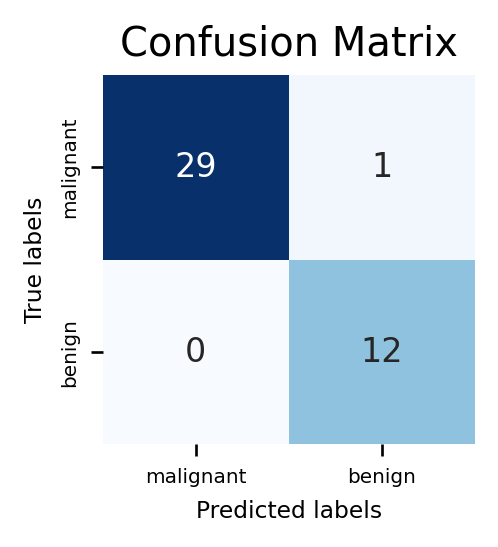

In [35]:
sgd_preds = sgd_grid.best_estimator_.predict(X_test_transformed)
conf_matrix = confusion_matrix(y_test, sgd_preds)
plt.figure(figsize=(2,2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [43]:
import numpy as np

def calculate_fpr_tpr(conf_matrix):
    
    # Ensure the confusion matrix is a 2x2 matrix
    if conf_matrix.shape != (2, 2):
        raise ValueError("Confusion matrix must be a 2x2 numpy array.")
    
    TN, FP = conf_matrix[0, 0], conf_matrix[0, 1]
    FN, TP = conf_matrix[1, 0], conf_matrix[1, 1]
    
    # Calculate FPR and TPR
    FPR = FP / (FP + TN) if (FP + TN) > 0 else 0.0
    TPR = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    FNR = FN / (FN + TP) if (FN + TP) > 0 else 0.0
    
    return FPR, TPR, FNR


In [44]:
print('FPR: {}\nRecall: {}'.format(*calculate_fpr_tpr(conf_matrix)))

FPR: 0.03333333333333333
Recall: 1.0


**SVM**

In [49]:
svc_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

svc = SVC(random_state=42, probability=True)

svc_grid = GridSearchCV(svc, svc_param_grid, cv = 3, n_jobs=12, refit=True, scoring='recall')

svc_grid.fit(X_train_transformed, y_train)

GridSearchCV(cv=3, estimator=SVC(probability=True, random_state=42), n_jobs=12,
             param_grid={'C': [10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             scoring='recall')

In [51]:
svc_conf_matrix = confusion_matrix(y_test, svc_grid.best_estimator_.predict(X_test_transformed))

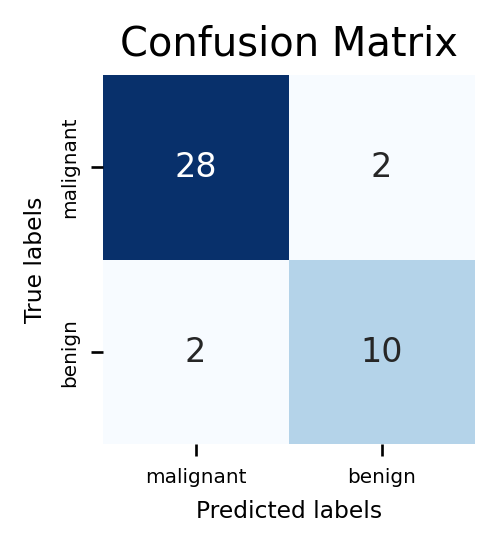

In [53]:
svc_preds = svc_grid.best_estimator_.predict(X_test_transformed)
conf_matrix = confusion_matrix(y_test, svc_preds)
plt.figure(figsize=(2,2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 10, 100],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()

knn_grid = GridSearchCV(knn, knn_param_grid, cv=3, n_jobs=12, refit=True, scoring='recall')

knn_grid.fit(X_train_transformed, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=12,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 10, 100],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

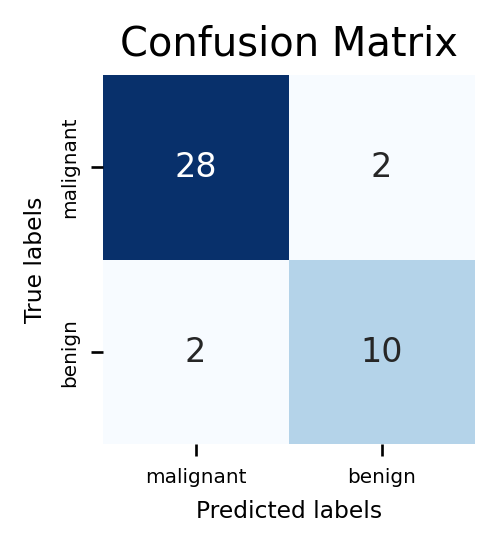

In [59]:
knn_preds = knn_grid.best_estimator_.predict(X_test_transformed)
knn_conf_matrix = confusion_matrix(y_test, knn_preds)
plt.figure(figsize=(2,2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### 3.3 Final results

From the final results calculate the _probability_ that a sample from a person with a malignant tumour is given a result that they do not have cancer.

In [45]:
false_negative_rate = calculate_fpr_tpr(conf_matrix)[-1]
print(f"The probability of a false negative is: {false_negative_rate:.2f}")

The probability of a false negative is: 0.00


## 4. Decision Boundaries [10%]
 - To finish up, the client wants a visualisation of how the final model is working and your line manager has asked you to show some of the decision boundaries.
 - The client also wants to know if your method has met their performance specifications.
 - Follow the next three steps (4.1, 4.2 and 4.3) to do these things.

### 4.1 Discriminative features

Although it is only possible to know the true usefulness of a feature when you've combined it with others in a machine learning method, it is still helpful to have some measure for how discriminative each feature is on its own.  One common method for doing this is to calculate a T-score (often used in statistics, and in the LDA machine learning method) for each feature.  

The formula for the T-score is:

_(mean(x2) - mean(x1))/(0.5*(stddev(x2) + stddev(x1)))_

where x1 and x2 are the feature values corresponding to the two classes. Large values for the T-score (either positive or negative) indicate discriminative ability.

**Calculate the T-score for each feature and print out the best 4 features according to this score.**

In [61]:
# Your code here
import numpy as np

def calculate_t_score(feature_values, labels):
    labels = labels.ravel()
    x1 = feature_values[labels == 0]
    x2 = feature_values[labels == 1]
    
    mean_x1 = np.mean(x1)
    mean_x2 = np.mean(x2)
    stddev_x1 = np.std(x1, ddof=1)  # Using ddof=1 for sample standard deviation
    stddev_x2 = np.std(x2, ddof=1)
    
    t_score = (mean_x2 - mean_x1) / (0.5 * (stddev_x2 + stddev_x1))
    return t_score

def top_discriminative_features(data, labels, n=4):
    num_features = data.shape[1]
    t_scores = np.zeros(num_features)
    
    for i in range(num_features):
        t_scores[i] = calculate_t_score(data[:, i], labels)
    
    # Get the indices of the features sorted by absolute T-score in descending order
    sorted_indices = np.argsort(np.abs(t_scores))[::-1]
    
    top_indices = sorted_indices[:n]
    for idx in top_indices:
        print(f"Feature index: {idx}, T-score: {t_scores[idx]:.4f}")
    
    return top_indices.tolist()

### 4.2 Visualise decision boundaries

**Display the decision boundaries** for each pair of features from the best 4 chosen above.  You can use the functions below to help if you like.

Instead of using the simple mean as the input for `xmean` in `plot_contours`, use the following:

_0.5*(mean(x1) + mean(x2))_

where x1 and x2 are the data associated with the two classes.  This way of calculating a "mean" point takes into account any imbalance between the classes.

In [ ]:
def make_meshgrid(x, y, ns=100):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on (only min and max used)
    y: data to base y-axis meshgrid on (only min and max used)
    ns: number of steps in grid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min(), x.max()
    y_min, y_max = y.min(), y.max()
    hx = (x_max - x_min)/ns
    hy = (y_max - y_min)/ns
    xx, yy = np.meshgrid(np.arange(x_min, x_max + hx, hx), np.arange(y_min, y_max + hy, hy))
    return xx, yy

In [ ]:
def plot_contours(clf, xx, yy, xmean, n1, n2, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    xmean : 1d array of N mean values (used to populate constant features with)
    n1, n2: index numbers of features that change
              that is, which features xx and yy represent, from the set of N features
    params: dictionary of params to pass to contourf, optional
    """
    # The following lines makes an MxN matrix to pass to the classifier (# samples x # features)
    # It does this by multiplying Mx1 and 1xN matrices, where the former is filled with 1's
    #  where M is the number of grid points in xx and N is the number of features in xmean
    #  It is done in such a way that the xmean vector is replaced in each row
    fullx = np.ones((xx.ravel().shape[0],1)) * np.reshape(xmean,(1,-1))
    fullx[:,n1] = xx.ravel()
    fullx[:,n2] = yy.ravel()
    Z = clf.predict(fullx)
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

In [ ]:
# Your code here

### 4.3 Performance specification
**Does the final model meet the client's criteria?  Explain why or why not.** [100 words maximum]

In [ ]:
# Answer here